In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

In [0]:
data=make_blobs(n_samples=100, n_features=3, centers=2,
                random_state=101)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data[0])

In [0]:
data_x=scaled_data[:,0]
data_y=scaled_data[:,1]
data_z=scaled_data[:,2]

In [0]:
from mpl_toolkits.mplot3d import Axes3D

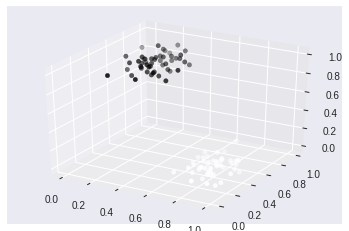

In [7]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(data_x,data_y,data_z,c=data[1])

In [0]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [0]:
num_inputs=3
num_hidden=2
num_outputs=num_inputs
learning_rate=0.01
x=tf.placeholder(tf.float32,shape=[None, num_inputs])

In [11]:
hidden=fully_connected(x,num_hidden,activation_fn=None)
output=fully_connected(hidden,num_outputs,activation_fn=None)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
loss=tf.reduce_mean(tf.square(output-x))
optimizer=tf.train.AdamOptimizer(learning_rate)
train=optimizer.minimize(loss)

In [0]:
init=tf.global_variables_initializer()
num_steps=1000
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_steps):
        sess.run(train,feed_dict={x:scaled_data})
    output_2d=hidden.eval(feed_dict={x:scaled_data})

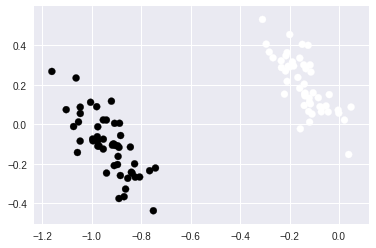

In [20]:
plt.scatter(output_2d[:,0],output_2d[:,1],c=data[1])